Домашнее задание

## Вам необходимо:
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.


Результат прислать в формате ссылки на Github с ноутбуком



## Описание данных
Для выполнения задания вам необходимы файлы train.csv, lectures.csv, questions.csv.

## **train.csv**
- row_id: (int64) ID code for the row.

- timestamp: (int64) the time in milliseconds between this user interaction and the first event completion from that user.

- user_id: (int32) ID code for the user.

- content_id: (int16) ID code for the user interaction

(Идентификационный код для взаимодействия с пользователем)

- content_type_id: (int8) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.

(0, если событием был вопрос, заданный пользователю, 1, если событием был просмотр пользователем лекции.)

- task_container_id: (int16) Id code for the batch of questions or lectures. For example, a user might see three questions in a row before seeing the explanations for any of them. Those three would all share a task_container_id.

(Код идентификатора для пакета вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидеть объяснения для любого из них. Все эти три вопроса будут иметь общий task_container_id.)

- user_answer: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.

(ответ пользователя на вопрос, если таковой имеется. Читать -1 как ноль, для лекций.)

- answered_correctly: (int8) if the user responded correctly. Read -1 as null, for lectures.

(если пользователь ответил правильно. Читайте -1 как ноль, для лекций.)

- prior_question_elapsed_time: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between. Is null for a user's first question bundle or lecture. Note that the time is the average time a user took to solve each question in the previous bundle.

(Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущем пакете вопросов, игнорируя любые лекции между ними. Имеет значение null для первого пакета вопросов или лекции пользователя. Обратите внимание, что время — это среднее время, которое потребовалось пользователю для решения каждого вопроса в предыдущем пакете.)

- prior_question_had_explanation: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.

(Увидел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущий пакет вопросов, игнорируя любые лекции между ними. Значение является общим для одного пакета вопросов и равно нулю для первого пакета вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, были частью диагностического теста на вступление, где он не получал никакой обратной связи.)


## **questions.csv**: metadata for the questions posed to users.
- question_id: foreign key for the train/test content_id column, when the content type is question (0).
- bundle_id: code for which questions are served together.
- correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right.
- part: the relevant section of the TOEIC test.
- tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.


## **lectures.csv**: metadata for the lectures watched by users as they progress in their education.
- lecture_id: foreign key for the train/test content_id column, when the content type is lecture (1).
- part: top level category code for the lecture.

(код категории верхнего уровня для лекции.)

- tag: one tag codes for the lecture. The meaning of the tags will not be provided, but these codes are sufficient for clustering the lectures together.

(один тег коды для лекции. Значение тегов не будет предоставлено, но эти коды достаточны для кластеризации лекций вместе.)

- type_of: brief description of the core purpose of the lecture.



In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_dtype = {
        'row_id': 'int64',
        'timestamp': 'int64',
        'user_id': 'int32',
        'content_id': 'int16',
        'content_type_id': 'int8',
        'task_container_id': 'int16',
        'user_answer': 'int8',
        'answered_correctly': 'int8',
        'prior_question_elapsed_time': 'float32',
        'prior_question_had_explanation': 'boolean'
    }
# подгрузим файлы, train конечно урежем
train_df = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/train.csv',
    nrows=10**7,
    dtype=train_dtype
)
lectures_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lectures.csv')
questions_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/questions.csv')


## Проверим данные (train, lecture, questions) через метод info и describe
describe для train в дефолтном виде ничего особо не принес

In [ ]:
train_df.info()
lectures_df.info()
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 314.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null

In [ ]:
display(train_df.describe())
display(lectures_df.describe())
display(questions_df.describe())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,9.765216e+06
mean,5.000000e+06,7.546528e+09,1.079943e+08,5.209509e+03,1.953960e-02,8.776194e+02,1.376462e+00,6.262029e-01,2.547560e+04
std,2.886751e+06,1.141381e+10,6.311024e+07,3.867783e+03,1.384117e-01,1.334407e+03,1.193603e+00,5.226395e-01,1.969462e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.500000e+06,5.109600e+08,5.398177e+07,2.059000e+03,0.000000e+00,1.020000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.000000e+06,2.612310e+09,1.067638e+08,5.016000e+03,0.000000e+00,3.710000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.499999e+06,9.751909e+09,1.630735e+08,7.402000e+03,0.000000e+00,1.055000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,9.999999e+06,8.470816e+10,2.167479e+08,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


сразу посмотрим размер наших данных


In [ ]:
display('train: ', train_df.shape)
display('lectures: ', lectures_df.shape)
display('questions: ', questions_df.shape)

'train: '

(10000000, 10)

'lectures: '

(418, 4)

'questions: '

(13523, 5)

чекнем пропущенные значеня

In [ ]:
display(train_df.isnull().sum())
display(lectures_df.isnull().sum())
display(questions_df.isnull().sum())

,0
row_id,0
timestamp,0
user_id,0
content_id,0
content_type_id,0
task_container_id,0
user_answer,0
answered_correctly,0
prior_question_elapsed_time,234784
prior_question_had_explanation,39388


,0
lecture_id,0
tag,0
part,0
type_of,0


,0
question_id,0
bundle_id,0
correct_answer,0
part,0
tags,1


## Простыми диаграммами посмотрим, что вообще представляют из себя наши данные в train.

на чарте видим, что 98% контента по фиче 'content_type_id' - это вопросы

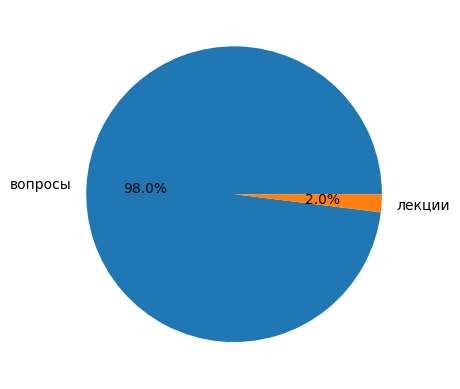

In [16]:
def pie_f(data, labels: tuple) :

  fig, ax = plt.subplots()
  ax.pie(pie_df, labels=labels, autopct='%1.1f%%')

  fig.show()

pie_df = train_df['content_type_id'].value_counts()
labels = 'вопросы', 'лекции'
pie_f(pie_df, labels)



Почти то же самое, что и выше, но разбито по вариантам для вопросов.
(да пусть будет)

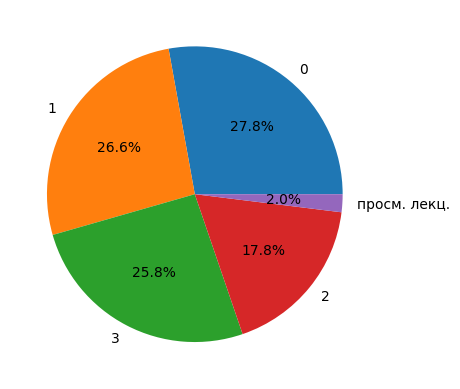

In [14]:
pie_df = train_df['user_answer'].value_counts()

labels = '0', '1', '3', '2', 'просм. лекц.'
pie_f(pie_f, labels)


Ниже уже интересненько, видим, что студенты отвечают правильно в 64.6% и 33.5%, лекции можно было бы отсюда убрать, но тут они не мешают.

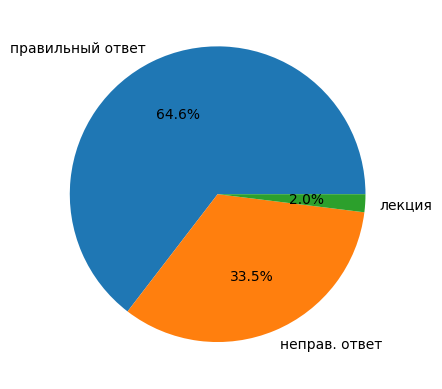

In [15]:
pie_df = train_df['answered_correctly'].value_counts()

labels = 'правильный ответ', 'неправ. ответ', 'лекция'
pie_f(pie_df, labels)

Теперь интересно стало, что там вообще с активностью студентов, это же легко проверить.
(ниже мы увидим как часто пользователи отмечались в нашем train, с какой-то актвностью, будь то лекции или вопросы)
П.С. ну тут только топ 40


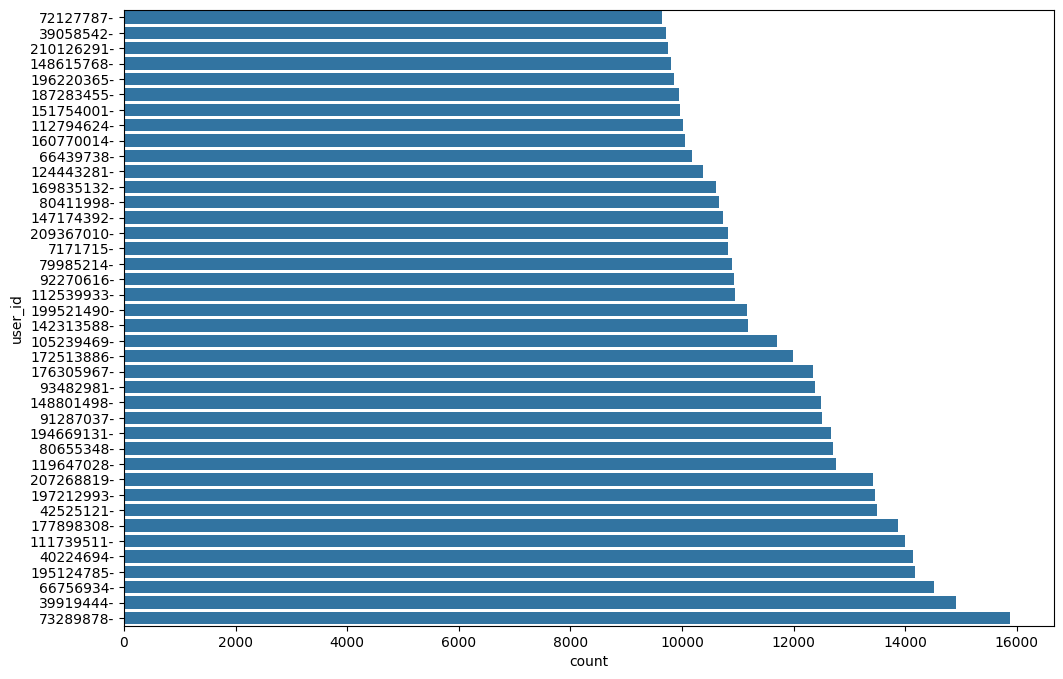

In [ ]:
user_activity = train_df['user_id'].value_counts().reset_index()
user_activity.columns = ['user_id', 'count']
user_activity['user_id'] = user_activity['user_id'].astype(str) + '-' # онли что б было читабельней
user_activity = user_activity.sort_values(['count'])
top = user_activity.tail(40)

fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(top, x='count', y='user_id')

fig.show()



хочется остановиться на двух графиках ниже
1. Процент правильных и неправильных ответов на вопросы среди топ 40 студентов по активности (также тут внесены лекции, а тут это уже важно для сравнения со вторым графиком)
2. Процент правильных и неправильных ответов на вопросы среди топ 40 худщих студентов по активности

ИТОГО: Видм очевидную разнцу, что более активные студеты более успешны в ответах и смотрят лекции. Соответственно студенты, которые менее активны, они не смотрят лекции в результате хуже успевают.


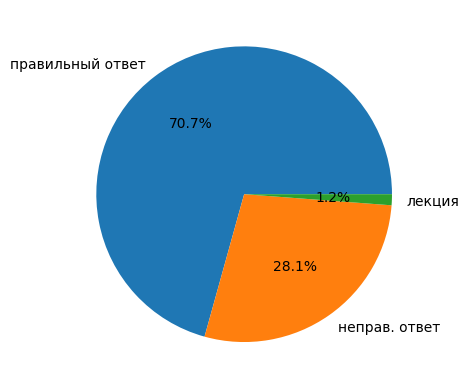

In [9]:
user_activity = train_df['user_id'].value_counts().reset_index()
top = user_activity['user_id'].head(40).unique()

pie_df = train_df[train_df['user_id'].isin(top)]['answered_correctly'].value_counts()

labels = 'правильный ответ', 'неправ. ответ', 'лекция'
pie_f(pie_df, labels)

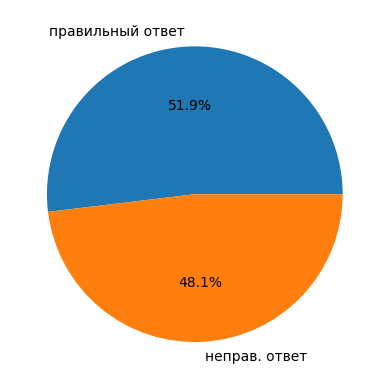

In [10]:
tail_top = user_activity['user_id'].tail(40).unique()

pie_df = train_df[train_df['user_id'].isin(tail_top)]['answered_correctly'].value_counts()

labels = 'правильный ответ', 'неправ. ответ'
pie_f(pie_df, labels)



Вычислим корреляцю и построим хитмап

<Axes: >

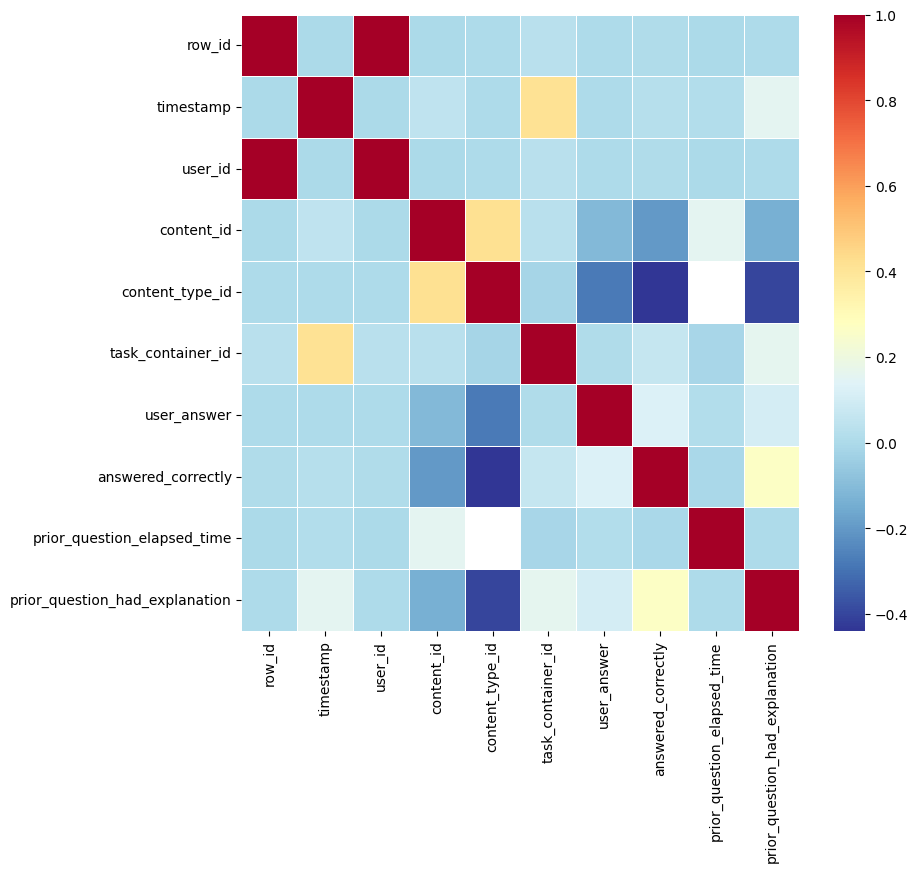

In [ ]:
corrmat = train_df.corr()
fig, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(corrmat, ax = ax, cmap = 'RdYlBu_r', linewidths = 0.5, fmt='.2g')


## Теперь перейдем к questions
в самом начале мы уже получили представление о данных в questions

изучим еще несколько характеристик данного датасета

In [ ]:
questions_df['tags'] = questions_df['tags'].astype(str)

tags = [x.split() for x in questions_df[questions_df.tags != "nan"].tags.values]
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'всего {len(tags)} различных тегов')

всего 188 различных тегов


In [ ]:

tags_list = [x.split() for x in questions_df.tags.values]
questions_df['tags'] = tags_list
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,"[51, 131, 162, 38]"
1,1,1,1,1,"[131, 36, 81]"
2,2,2,0,1,"[131, 101, 162, 92]"
3,3,3,0,1,"[131, 149, 162, 29]"
4,4,4,3,1,"[131, 5, 162, 38]"


Посмотрим сколько ответов было правильным и неправильным по question_id (то есть по content_id в train).

In [27]:
correct = train_df[train_df.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size() # отфильтруем -1 (лекции), добавим size для pivot
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['Wrong', 'Right']
correct = correct.fillna(0)
correct[['Wrong', 'Right']] = correct[['Wrong', 'Right']].astype(int)
questions_df = questions_df.merge(correct, left_on = "question_id", right_on = "content_id", how = "left")
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags,Wrong,Right
0,0,0,0,1,51 131 162 38,63.0,628.0
1,1,1,1,1,131 36 81,77.0,649.0
2,2,2,0,1,131 101 162 92,1970.0,2531.0
3,3,3,0,1,131 149 162 29,500.0,1776.0
4,4,4,3,1,131 5 162 38,1173.0,1980.0


Можно сложить все Неправильные и Правильные ответы для всех вопросов, помеченных определенным тегом, и вычислить процент правильных ответов для каждого тега. Учитываем, что есть дублирование подсчета вопросов, т.е., если у вопроса 5 тегов, его ответы суммируются в суммах каждого из 5 тегов.

In [ ]:
tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = questions_df[questions_df.tags.apply(lambda l: tags[x] in l)]
    df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']})
    df1['Total_questions'] = df1.Wrong + df1.Right
    df1['Question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = tags_df._append(df1)

tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int)
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions
tags_df = tags_df.sort_values(by = "Percent_correct")

tags_df.head()

,Wrong,Right,Total_questions,Question_ids_with_tag,Percent_correct
tag,,,,,
24,15523,9653,25176,17,0.383421
23,25673,20228,45901,11,0.440688
19,17267,13833,31100,57,0.444791
151,26954,25882,52836,16,0.489855
108,23213,23511,46724,20,0.503189


Ниже увидим что есть весомые разлличия

посмотрим на топ 10 самых сложных тегов по вопросам и топ 10 самых легких, где студенты ошибались меньше всего

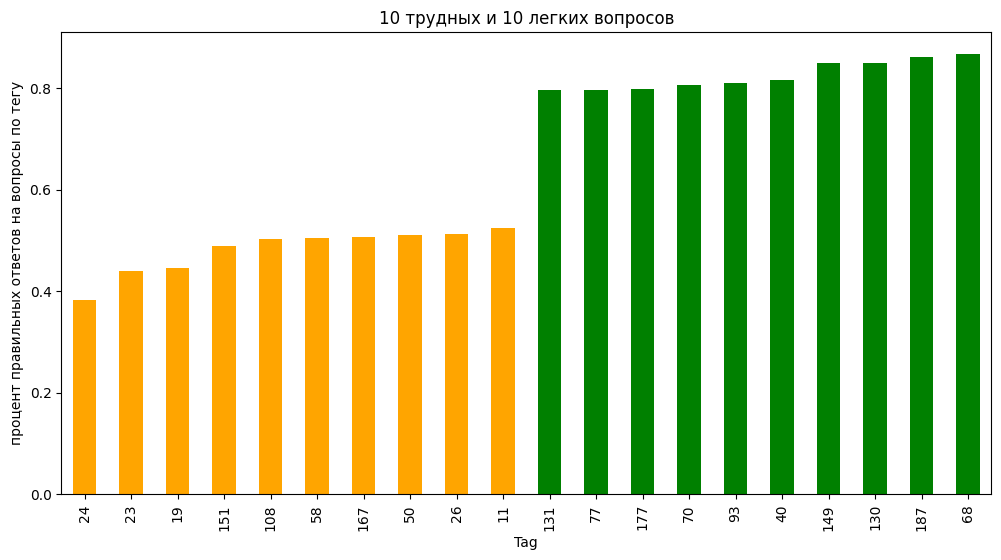

In [ ]:
select_rows = list(range(0,10)) + list(range(178, len(tags_df)))
tags_select = tags_df.iloc[select_rows,4]

fig = plt.figure(figsize=(12,6))
x = tags_select.index
y = tags_select.values
clrs = ['orange' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title('10 трудных и 10 легких вопросов')
plt.xlabel('Tag')
plt.ylabel('процент правильных ответов на вопросы по тегу')
plt.xticks(rotation=90)
plt.show()

для понимания общей картины также оценим сколько ответов на вопросы по тегам (топ 30 тегов)

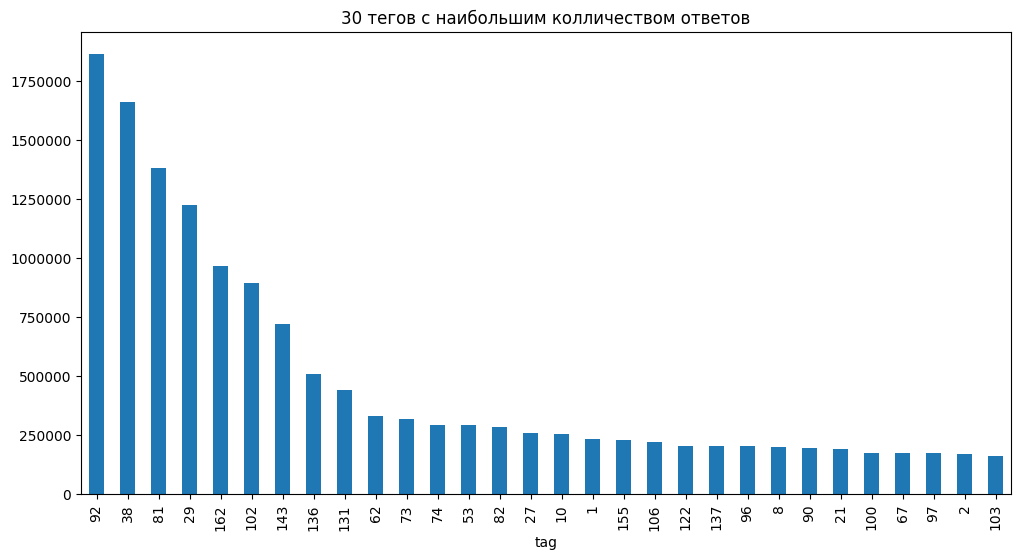

In [ ]:
tags_select = tags_df.sort_values(by = 'Total_questions', ascending = False).iloc[:30,:]
tags_select = tags_select['Total_questions']

fig = plt.figure(figsize=(12,6))
ax = tags_select.plot.bar()
plt.title('30 тегов с наибольшим колличеством ответов')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Остался lections

task_container_id также могут содержать лекции, имеется возможность узнать, есть ли пакеты с большим количеством лекций

In [ ]:
lec = train_df.groupby(['task_container_id', 'answered_correctly']).size().unstack()
lec.columns = ['Lecture', 'Wrong', 'Right']
lec['Lecture'] = lec['Lecture'].fillna(0)
lec = lec.astype('Int64')
lec['Percent_correct'] = lec.Right/(lec.Wrong + lec.Right)
lec['Percent_lecture'] = lec.Lecture/(lec.Lecture + lec.Wrong + lec.Right)
lec = lec.sort_values(by = 'Percent_lecture', ascending = False)

print(f'Наибольшее колличество просмотренных лекций в рамках одного task_container_id - {lec.Lecture.max()}')

Наибольшее колличество просмотренных лекций в рамках одного task_container_id - 523


Корреляции между percent_lecture и percent_correct нет.

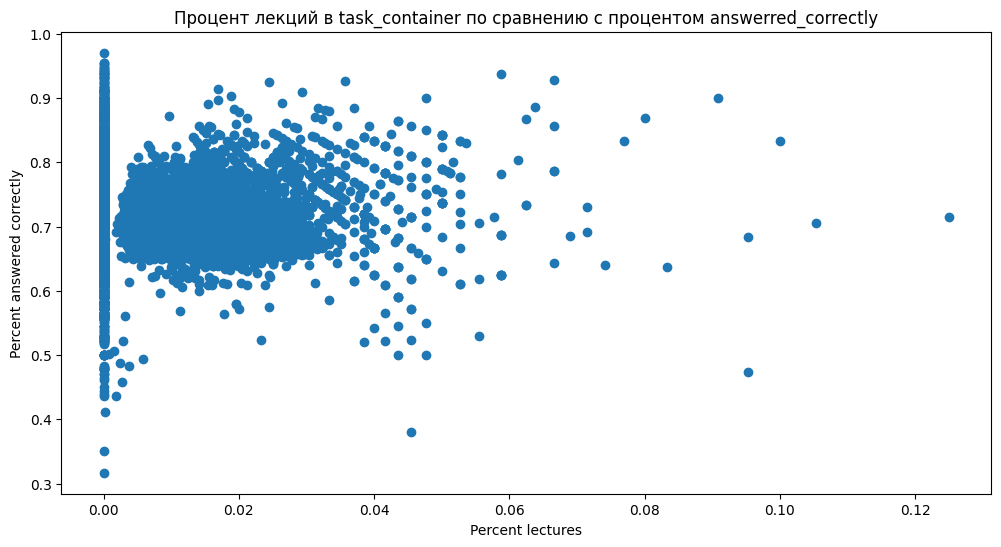

In [ ]:
b = lec.iloc[:, 3:]

fig = plt.figure(figsize=(12,6))
x = b.Percent_lecture
y = b.Percent_correct
plt.scatter(x, y, marker='o')
plt.title('Процент лекций в task_container по сравнению с процентом answerred_correctly')
plt.xticks(rotation=0)
plt.xlabel('Percent lectures')
plt.ylabel('Percent answered correctly')

plt.show()